# AdventureWorks for Sales Analys
This analys we seek for AdventureWorks database to answer questions such as:
- Prodtc categories and their sales volume
- Sales trends in time
- sales performance for each region

We use SQL to get data and Python for visualisations. 



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, text
from urllib.parse import quote_plus


server = '.\\SQLEXPRESS'
database = 'AdventureWorks2025'
driver = quote_plus("ODBC Driver 17 for SQL server")


connection_string = (
    f"mssql+pyodbc://@{server}/{database}"
    f"?driver={driver}&trusted_connection=yes&Encrypt=yes&TrustServerCertificate=yes"
)

engine = create_engine(connection_string)


try:
    with engine.connect():
        print("✅ Connection to SQL Server successful!")
except Exception as e:
    print("❌ Could not connect to the database.", e)

✅ Connection to SQL Server successful!


C:\Users\AliAkyel\AppData\Local\Temp\ipykernel_7920\3500691540.py:21: SAWarning: Unrecognized server version info '17.0.1000.7'.  Some SQL Server features may not function properly.
  with engine.connect():


In [5]:
def query_df(sql: str):
    with engine.connect() as conn:
        return pd.read_sql(text(sql), conn)
    

**Din Jupyter Notebook ska följa denna struktur:**

## Introduktion (Markdown)
AdventureWorks Försäljningsanalys
Syfte: Beskriv kort vad analysen handlar om

## Setup (Code)
Imports
Connection
server = 'localhost'
database = 'AdventureWorks2022'
... connection string & engine

## Visualisation 1: Number of products per category
Business Question: How many products are in each category?

Data Requirements:

- Use tables: Production.ProductCategory, Production.ProductSubcategory, Production.Product
- Count unique products per category

Visualization Requirements:

- Type: Vertical Bar Chart (Bar)
- Title: "Number of Products per Category"

Insight Requirements:

- Explain which category has the most/least products.

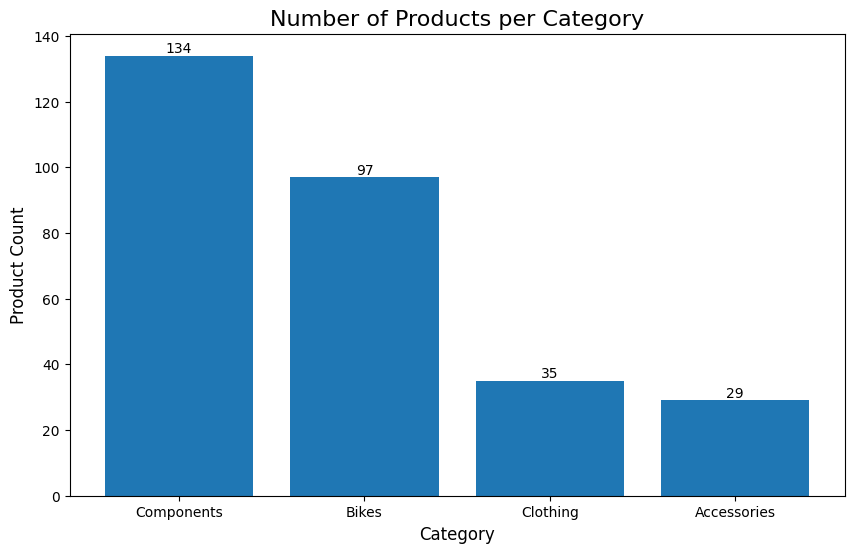

Data Overview:
  CategoryName  ProductCount
0   Components           134
1        Bikes            97
2     Clothing            35
3  Accessories            29


In [12]:
# --- QUESTION 1: Number of Products per Category ---

# 1. READ SQL FROM FILE
# Pointing to your specific folder "data" and file "query1.sql"
with open('../data/query1.sql', 'r') as file:
    query_q1 = file.read()

# 2. GET DATA
df_q1 = pd.read_sql(query_q1, engine)

# 3. VISUALIZE
plt.figure(figsize=(10, 6))
bars = plt.bar(df_q1['CategoryName'], df_q1['ProductCount'], color='#1f77b4')

plt.title('Number of Products per Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Product Count', fontsize=12)
plt.bar_label(bars)
plt.show()

# 4. INSIGHTS
print("Data Overview:")
print(df_q1)

**Add insight for the visualization above**

## Visualization 2: Sales by Product Category

Which product categories generate the most revenue?

Data Requirements:

- Use tables: Production.ProductCategory, Production.ProductSubcategory, Production.Product, Sales.SalesOrderDetail
- Sort from highest to lowest sales

Visualization Requirements:

- Type: Horizontal Bar Chart (barh)
- Title: "Total Sales by Product Category"
- Sort bars from highest to lowest (highest at the top)

Insight Requirements:

- Explain which category is the largest and smallest, with exact numbers.